In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
fifa = pd.read_csv('fifa_data.cvs.txt',sep=',')
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


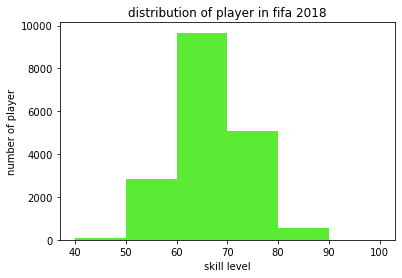

In [5]:
bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall, bins=bins,color ='#5beb34')

plt.xticks(bins)

plt.ylabel('number of player')
plt.xlabel('skill level')
plt.title('distribution of player in fifa 2018')
plt.show()

In [6]:
fifa['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

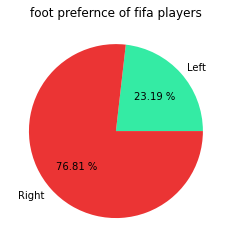

In [14]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right =fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left','Right']
colors = ['#34eba4','#eb3434']
plt.pie([left,right],labels = labels , colors = colors, autopct ='%.2f %%')
plt.title('foot prefernce of fifa players')

plt.show()


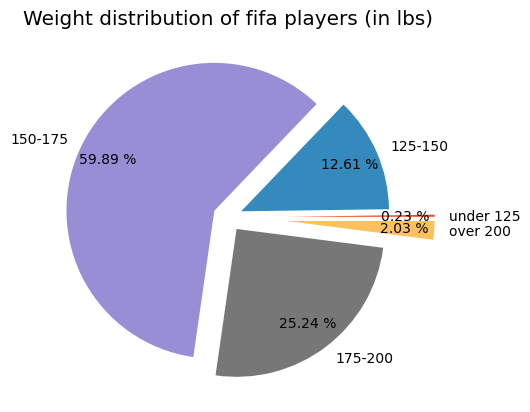

In [32]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x  in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125 ].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150) ].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175) ].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200 )].count()[0]
heavy = fifa[(fifa.Weight >= 200) ].count()[0]
                        
weights = [light,light_medium,medium,medium_heavy,heavy]
labels = ['under 125', '125-150','150-175','175-200','over 200']  
explode =(.4,.1,.1,.1,.4)
plt.title('Weight distribution of fifa players (in lbs)')

plt.pie(weights,labels =labels , autopct= '%.2f %%',pctdistance=0.8, explode=explode)
                        
plt.show()                       

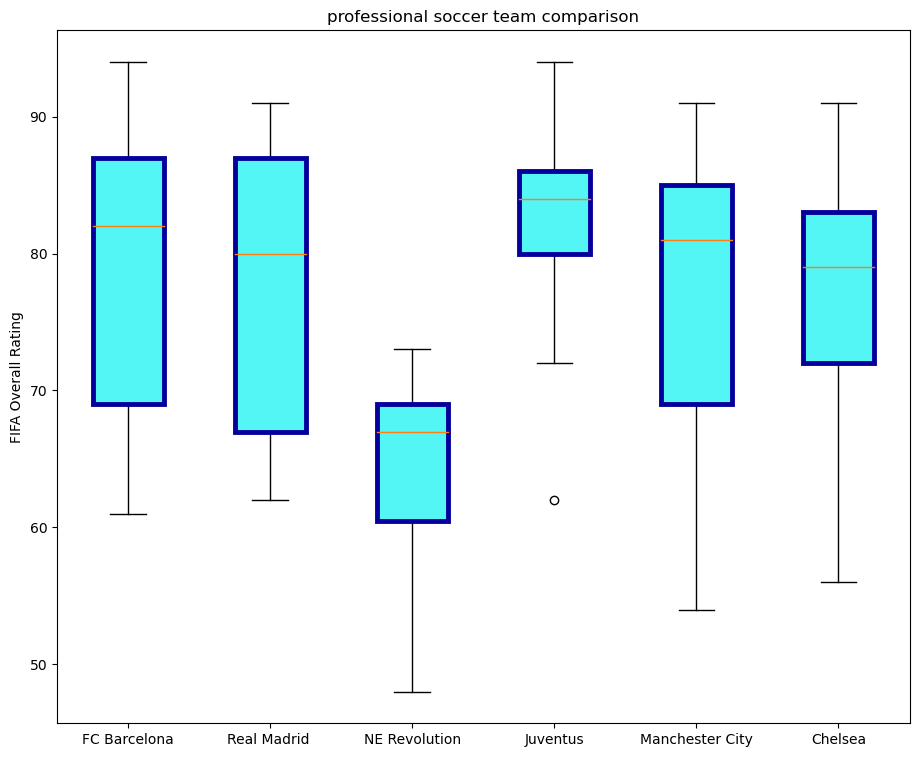

In [68]:
plt.style.use('default')

plt.figure(figsize=(11,9))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall'] 
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
juventus = fifa.loc[fifa.Club == 'Juventus']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
Manchester  =fifa.loc[fifa.Club == 'Manchester City']['Overall']
chelsa = fifa.loc[fifa.Club == 'Chelsea']['Overall']
labels = ['FC Barcelona','Real Madrid ','NE Revolution','Juventus','Manchester City','Chelsea']

boxes = plt.boxplot([barcelona, madrid, revs,juventus,Manchester,chelsa],labels = labels,patch_artist=True )
for box in boxes['boxes']:
    # set edge color
    box.set(color="#05009c", linewidth=3.5)
    # change fill color (patch_artist)
    box.set(facecolor='#53f5f5')
plt.title('professional soccer team comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()